In [1]:
from openpharmacophore import PLComplex
import openpharmacophore.data as data

# Protein-ligand complex binding site and chemical features

We want to extract the binding site of a protein-ligand complex so, we can visualize protein-ligand interactions, which are also
required for extracting a protein-ligand receptor pharmacophore.

In [2]:
pl_complex = PLComplex(data.pdb["3bbh_hyd.pdb"])
pl_complex.has_hydrogens()

True

We set the ligand whose chemical features we want to obtain, and we see that its bond orders are not correct

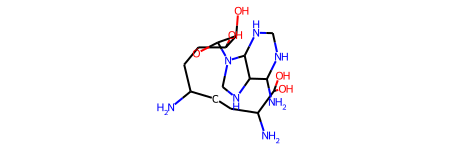

In [3]:
pl_complex.set_ligand(pl_complex.ligand_ids[0])
pl_complex.ligand_to_mol()
pl_complex.ligand

We fix the ligand. Its bond orders are correct now and it contains hydrogens

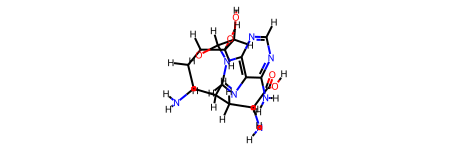

In [4]:
pl_complex.fix_ligand(
        smiles="c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3)C[C@H](CC[C@@H](C(=O)O)N)N)O)O)N",
        add_hydrogens=True)
pl_complex.ligand

We get the centroids of the ligand chemical features so, we can visualize them

In [5]:
feats = ["hydrophobicity", "positive charge", "negative charge"]
ligand_feats = {}
for feat_name in feats:
    ligand_feats[feat_name] = pl_complex.ligand_features(feat_name, frame=0)[0]
receptor_feats = {}
for feat_name in feats:
    ligand_feats[feat_name] = pl_complex.receptor_features(feat_name, frame=0)[0]

Also the hydrogen bonds

In [6]:
hbond_indices = pl_complex.hbond_indices(frame=0, criterion="baker")
hbonds = {
    "hb acceptor": pl_complex.hbonds_acceptors(hbond_indices, frame=0),
    "hb donor": pl_complex.hbonds_donors(hbond_indices, frame=0)
}

Finally we visualize the binding site with the chemical features

In [7]:
bsite_indices = pl_complex.binding_site_indices(frame=0)
view = pl_complex.interactions_view(bsite_indices, feats=[ligand_feats, receptor_feats, hbonds])
view

NGLWidget()